In [47]:
# INF2178 Assignment 4
# Name: Yuyang Liu
# Student ID: 1005965617

In [48]:
# Import relevant data libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
%pip install pingouin
import pingouin as pg

# Import the data file
df=pd.read_csv("INF2178_A4_data.csv")
df.head(5)

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


**Exploratory Data Analysis (EDA)**

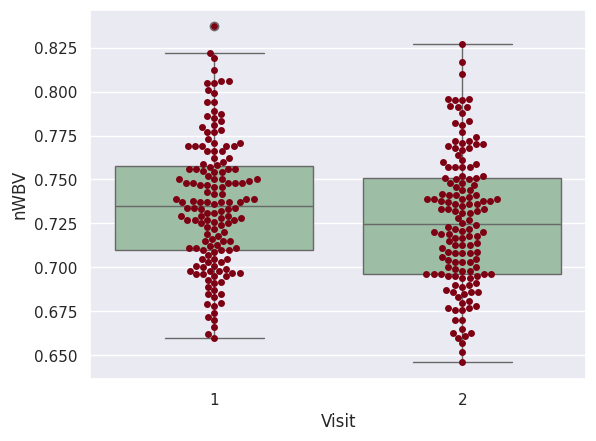

In [49]:
# Build boxplot and swarmplot to view distribution
ax = sns.boxplot(x='Visit', y='nWBV', data=df, color='#99c2a2')
ax = sns.swarmplot(x="Visit", y="nWBV", data=df, color='#7d0013')
plt.show()

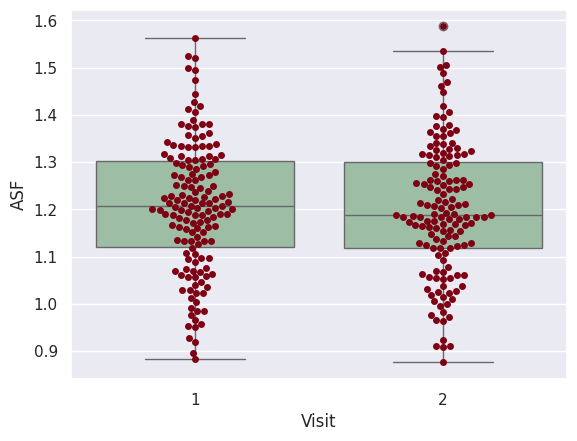

In [50]:
# Build boxplot and swarmplot to view distribution
ax = sns.boxplot(x='Visit', y='ASF', data=df, color='#99c2a2')
ax = sns.swarmplot(x="Visit", y="ASF", data=df, color='#7d0013')
plt.show()

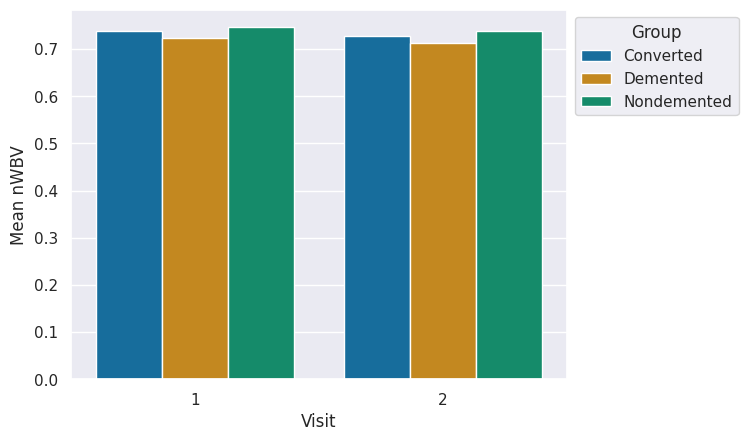

In [51]:
# Create barplot to view distribution by group
df_mean1 = df.groupby(['Group', 'Visit'])['nWBV'].mean().reset_index()

sns.barplot(data=df_mean1, x='Visit', y='nWBV', hue='Group', palette='colorblind')
plt.xlabel('Visit')
plt.ylabel('Mean nWBV')
plt.legend(title='Group', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

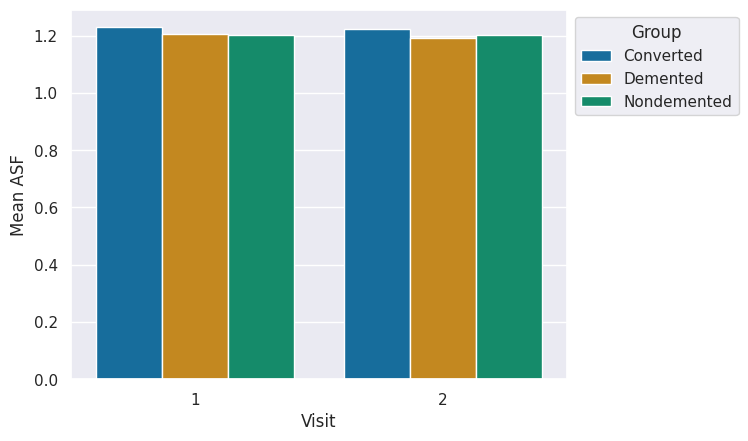

In [52]:
# Create barplot to view distribution by group
df_mean2 = df.groupby(['Group', 'Visit'])['ASF'].mean().reset_index()

sns.barplot(data=df_mean2, x='Visit', y='ASF', hue='Group', palette='colorblind')
plt.xlabel('Visit')
plt.ylabel('Mean ASF')
plt.legend(title='Group', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

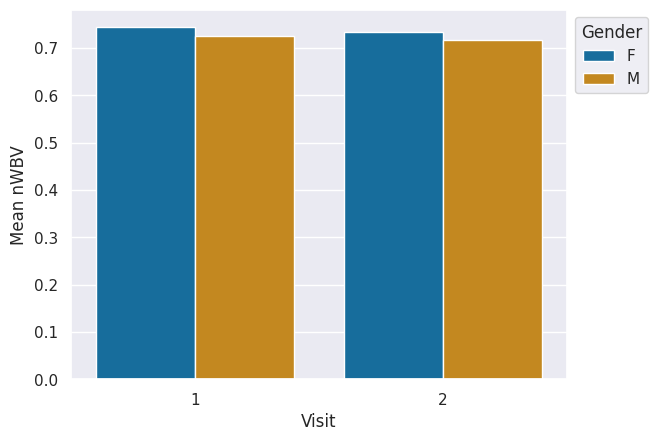

In [53]:
# Create barplot to view distribution by gender
df_mean3 = df.groupby(['M/F', 'Visit'])['nWBV'].mean().reset_index()

sns.barplot(data=df_mean3, x='Visit', y='nWBV', hue='M/F', palette='colorblind')
plt.xlabel('Visit')
plt.ylabel('Mean nWBV')
plt.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

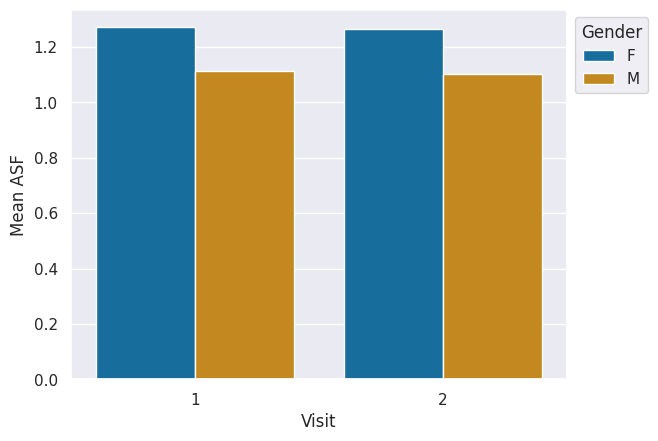

In [54]:
# Create barplot to view distribution by gender
df_mean = df.groupby(['M/F', 'Visit'])['ASF'].mean().reset_index()

sns.barplot(data=df_mean, x='Visit', y='ASF', hue='M/F', palette='colorblind')
plt.xlabel('Visit')
plt.ylabel('Mean ASF')
plt.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

**Mixed-Effects ANOVA Analysis & Assumption Check**

In [55]:
# Conduct mixed-effects ANOVA test for first question
aov1 = pg.mixed_anova(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=df)
pg.print_table(aov1)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Group        0.034      2    141  0.017   6.712    0.002  0.087  nan
Visit        0.007      1    141  0.007  94.251    0.000  0.401    1.000
Interaction  0.000      2    141  0.000   1.534    0.219  0.021  nan



In [56]:
# Post-hoc test for the first mixed ANOVA
posthocs1 = pg.pairwise_ttests(dv='nWBV', within='Visit', between='Group',
                              subject='Subject ID', data=df)
pg.print_table(posthocs1)

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)



POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc                 BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  -------------------  --------
Visit          -        1          2            True      True           9.672  143.000  two-sided        0.000  225800000000000.000     0.255
Group          -        Converted  Demented     False     True           1.401   14.676  two-sided        0.182                0.668     0.469
Group          -        Converted  Nondemented  False     True          -0.648   15.832  two-sided        0.527                0.361    -0.188
Group          -        Demented   Nondemented  False     True          -3.690  129.436  two-sided        0.000               75.094    -0.633
Visit * Group  1        Converted  Demented     False     True           1.444   14.626  two-sided        0.170              

<Axes: xlabel='Visit', ylabel='nWBV'>

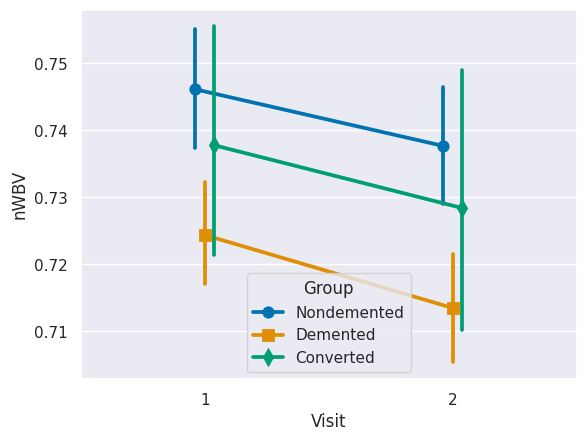

In [57]:
# Create output plot for research question 1
sns.set()
sns.pointplot(data=df, x='Visit', y='nWBV', hue='Group', dodge=True, markers=['o','s','d'], palette='colorblind')

In [58]:
# Check normality assumption
pg.normality(data=df, dv='nWBV', group='Visit')

,W,pval,normal
Visit,,,
1,0.990075,0.372060,True
2,0.989654,0.366703,True


In [59]:
# Check homogeneity of variances
pg.homoscedasticity(data=df, dv='nWBV', group='Visit')

,W,pval,equal_var
levene,0.504444,0.478121,True


In [60]:
# Conduct mixed-effects ANOVA test for second question
aov2 = pg.mixed_anova(dv='nWBV', within='Visit', between='M/F', subject='Subject ID', data=df)
pg.print_table(aov2)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
M/F          0.021      1    142  0.021   8.030    0.005  0.054  nan
Visit        0.007      1    142  0.007  93.305    0.000  0.397    1.000
Interaction  0.000      1    142  0.000   0.621    0.432  0.004  nan



In [61]:
# Post-hoc test for the second mixed ANOVA
posthocs2 = pg.pairwise_ttests(dv='nWBV', within='Visit', between='M/F',
                              subject='Subject ID', data=df)
pg.print_table(posthocs2)


POST HOC TESTS

Contrast     Visit    A    B    Paired    Parametric        T      dof  alternative      p-unc                 BF10    hedges
-----------  -------  ---  ---  --------  ------------  -----  -------  -------------  -------  -------------------  --------
Visit        -        1    2    True      True          9.672  143.000  two-sided        0.000  225800000000000.000     0.255
M/F          -        F    M    False     True          2.821  122.930  two-sided        0.006                6.506     0.478
Visit * M/F  1        F    M    False     True          2.974  124.056  two-sided        0.004                9.607     0.502
Visit * M/F  2        F    M    False     True          2.608  122.876  two-sided        0.010                3.902     0.442



/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


<Axes: xlabel='Visit', ylabel='nWBV'>

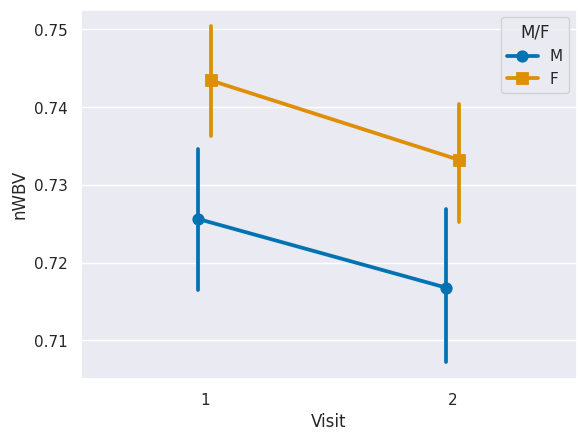

In [62]:
# Create output plot for research question 2
sns.set()
sns.pointplot(data=df, x='Visit', y='nWBV', hue='M/F', dodge=True, markers=['o','s'], palette='colorblind')

In [63]:
# Change the outcome variable to "ASF"
aov3 = pg.mixed_anova(dv='ASF', within='Visit', between='Group', subject='Subject ID', data=df)
pg.print_table(aov3)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
Group        0.018      2    141  0.009  0.234    0.792  0.003  nan
Visit        0.003      1    141  0.003  8.754    0.004  0.058    1.000
Interaction  0.001      2    141  0.000  1.028    0.361  0.014  nan



In [64]:
# Post-hoc test for the third mixed ANOVA
posthocs3 = pg.pairwise_ttests(dv='ASF', within='Visit', between='Group',
                              subject='Subject ID', data=df)
pg.print_table(posthocs3)

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)



POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc    BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  ------  --------
Visit          -        1          2            True      True           2.958  143.000  two-sided        0.004   5.990     0.047
Group          -        Converted  Demented     False     True           0.781   17.188  two-sided        0.446   0.392     0.221
Group          -        Converted  Nondemented  False     True           0.639   17.093  two-sided        0.531   0.360     0.172
Group          -        Demented   Nondemented  False     True          -0.224  129.354  two-sided        0.823   0.191    -0.039
Visit * Group  1        Converted  Demented     False     True           0.737   17.480  two-sided        0.471   0.382     0.206
Visit * Group  1        Converted  Nondemented  False     True           

<Axes: xlabel='Visit', ylabel='ASF'>

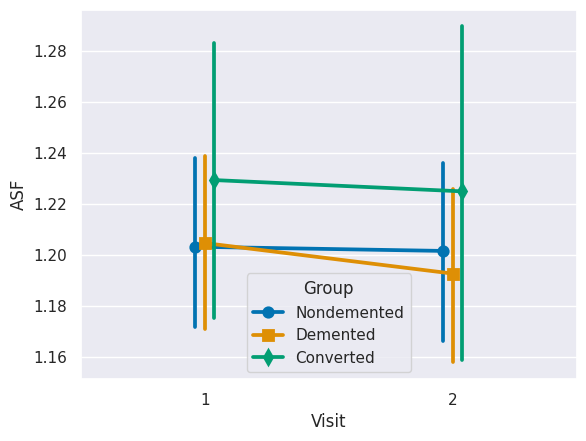

In [65]:
# Create output plot for research question 2
sns.set()
sns.pointplot(data=df, x='Visit', y='ASF', hue='Group', dodge=True, markers=['o','s','d'], palette='colorblind')

In [66]:
# Check normality assumption
pg.normality(data=df, dv='ASF', group='Visit')

,W,pval,normal
Visit,,,
1,0.992676,0.641561,True
2,0.992931,0.698794,True


In [67]:
# Check homogeneity of variances
pg.homoscedasticity(data=df, dv='ASF', group='Visit')

,W,pval,equal_var
levene,0.125435,0.723468,True


**Statistical Power Analysis**

Required sample size: 45.4507


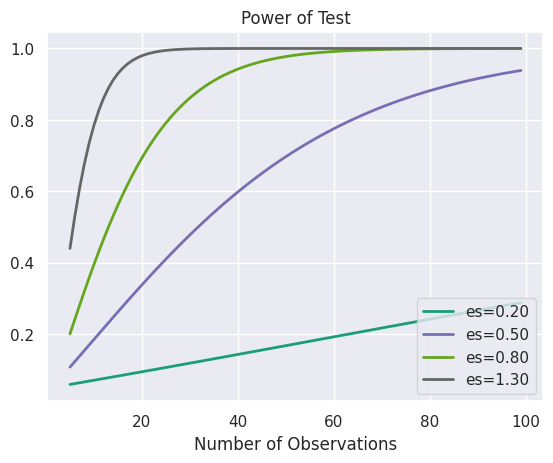

In [68]:
# Conduct statistical power analysis and find appropriate sample size
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# Define related variables' value
effect_size = 0.7
alpha = 0.05
power = 0.91

# Find appropriate sample size
obj = TTestIndPower()
sample_size = obj.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
print(f"Required sample size: {sample_size:.4f}")

# Create a power plot
effect_sizes = np.array([0.2, 0.5, 0.8, 1.3])
sample_sizes = np.array(range(5, 100))

obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.title('Power of Test')
plt.show()